In [11]:
import cv2 #open cv for image processing
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [12]:
image_path = '/content/fruits.jpg'
image = cv2.imread(image_path)

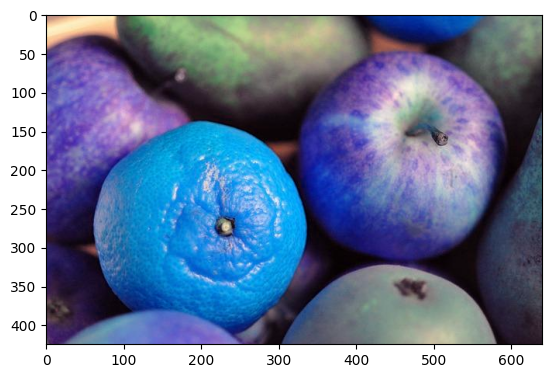

In [13]:
plt.imshow(image)

In [14]:
#Display the image converts the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


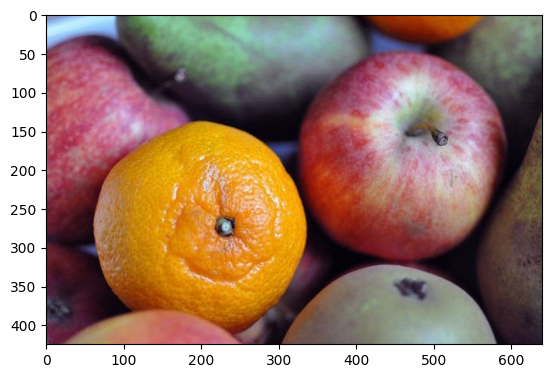

In [15]:
plt.imshow(image_rgb)
plt.axis()
plt.show()

In [20]:
#resized the image to 500 x 500 pixels
resized_image = cv2.resize(image_rgb,(500,500))

In [21]:
#save the preprocess image
cv2.imwrite('resized_image.jpg',resized_image)

True

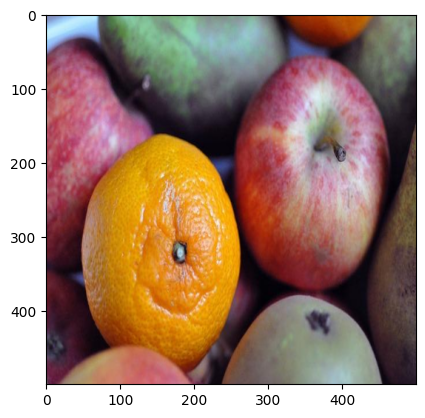

In [22]:
#display using mathplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

In [23]:
#rotate the image
rotated_image_90 = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)

In [24]:
#save the rotated image
cv2.imwrite('rotated_image_90.jpg',rotated_image_90)


True

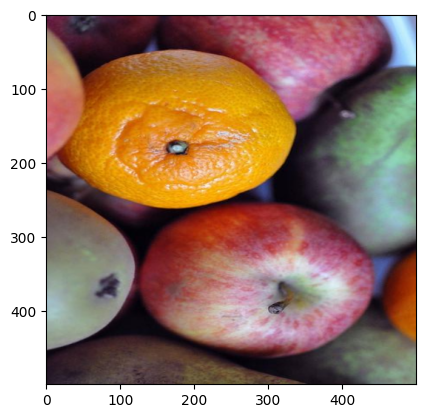

In [25]:
#display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

In [27]:
#Denoise the image
denoised_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

In [28]:
#save the denoise image
cv2.imwrite('denoised_image.jpg',denoised_image)

True

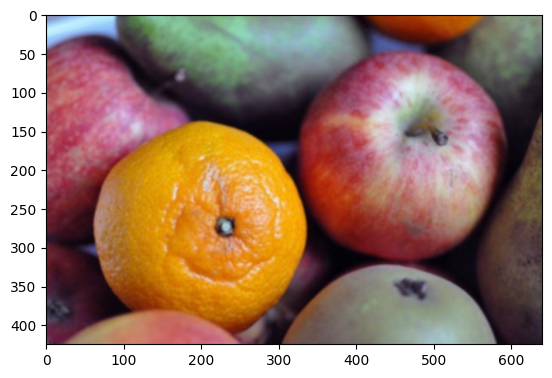

In [29]:
#Display the image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

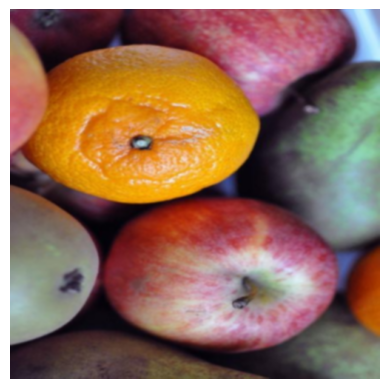

In [30]:
# Apply resizing, rotation, and denoising to the image and save it as a processed image
image = cv2.imread('/content/fruits.jpg')

# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the same image to 500x500 pixels
image_rgb = cv2.resize(image_rgb, (500, 500))

# Rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Denoise the image using Gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the processed image
cv2.imwrite('processed_image.jpg', image_rgb)

# Display the denoised image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()


In [38]:
#metadata for the processed fruit image
metadata = {
    "processed_image.jpg": {
        "keywords":["Fruits", "Healthy food", "green"],
        "description" : "A processed fruit image with resizing, rotation, and denoising applied."
  }
}

In [39]:
#save the data to Json file
with open('image_metadata.json', 'w') as json_file:
  json.dump(metadata, json_file, indent = 4)

In [45]:
processed_image = cv2.imread('/content/processed_image.jpg')

In [46]:
#calculate mean and the norm of pixel intensity
mean_intensity = np.mean(processed_image)
norm_intensity = np.linalg.norm(processed_image)

In [54]:
#conver to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

#Apply canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

#Find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #similar height from a area

#Iterate through each contours to calculate the shape featres
for contour in contours:
  #Area
  area = cv2.contourArea(contour)

  #Perimeter
  perimeter = cv2.arcLength(contour, True)

  #cetroid
  moments = cv2.moments(contour)
  if moments["m00"] != 0:
    cX = int(moments["m10"] / moments["m00"])
    cY = int(moments["m01"] / moments["m00"])

  else:
    cX, cY = 0,0

  #Bounding Box
  x, y,w,h = cv2.boundingRect(contour)

  #print the shape features
  print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({cX},{cY}), Bounding Box: ({x},{y}),Width:{w}, Height: {h}")

Area: 11.5, Perimeter: 66.18376517295837, Centroid: (321,396), Bounding Box: (309,391),Width:20, Height: 11
Area: 17.0, Perimeter: 113.74011433124542, Centroid: (307,399), Bounding Box: (300,387),Width:22, Height: 19
Area: 11.5, Perimeter: 144.6101714372635, Centroid: (75,375), Bounding Box: (67,367),Width:31, Height: 16
Area: 5.0, Perimeter: 66.28427064418793, Centroid: (319,363), Bounding Box: (313,361),Width:18, Height: 16
Area: 8.0, Perimeter: 35.79898929595947, Centroid: (95,360), Bounding Box: (92,355),Width:7, Height: 12
Area: 109.0, Perimeter: 738.2640615701675, Centroid: (84,341), Bounding Box: (0,237),Width:121, Height: 218
Area: 4.0, Perimeter: 33.79898929595947, Centroid: (145,198), Bounding Box: (140,194),Width:14, Height: 9
Area: 21.0, Perimeter: 73.39696848392487, Centroid: (25,205), Bounding Box: (14,192),Width:26, Height: 25
Area: 1.0, Perimeter: 44.485281229019165, Centroid: (191,189), Bounding Box: (171,189),Width:22, Height: 2
Area: 1.0, Perimeter: 4.828427076339722

## **Metadata for all the image features extracted**

In [55]:
#collect all the shape features as a dictionary
shape_feature = {
    "area": area,
    "perimeter": perimeter,
    "centroid": (cX, cY),
    "bounding_box": (x, y, w, h)
}


In [58]:
#collect all the features extracted from the processed_image and store as a metadata
features_extracted = {
    "mean_intensity": mean_intensity,
    "norm_intensity": norm_intensity,
    "shape_features": shape_feature
}


In [59]:
#save the features to a json file
with open('image_features.json','w') as json_file:
  json.dump(features_extracted, json_file, indent = 4)

Text Processing




In [60]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [66]:
#Download stopwords and punkkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [67]:
with open('/content/101551') as file:
  document_101551 = file.read()

In [68]:
document_sample = document_101551[621:-15]

In [69]:
document_sample_lower = document_sample.lower()

In [70]:
tokens = word_tokenize(document_sample_lower)

In [71]:
tokens

[':',
 '|',
 '>',
 ':',
 'i',
 'have',
 'been',
 'active',
 'in',
 'defending',
 'saturn',
 'lately',
 'on',
 'the',
 'net',
 'and',
 'would',
 '|',
 '>',
 ':',
 'like',
 'to',
 'state',
 'my',
 'full',
 'opinion',
 'on',
 'the',
 'subject',
 ',',
 'rather',
 'than',
 'just',
 'reply',
 'to',
 'others',
 "'",
 '|',
 '>',
 ':',
 'points',
 '.',
 '|',
 '>',
 ':',
 '|',
 '>',
 ':',
 'the',
 'biggest',
 'problem',
 'some',
 'people',
 'seem',
 'to',
 'be',
 'having',
 'is',
 'that',
 'saturn',
 '|',
 '>',
 ':',
 'dealers',
 'make',
 '~',
 '$',
 '2k',
 'on',
 'a',
 'car',
 '.',
 'i',
 'think',
 'most',
 'will',
 'agree',
 'with',
 'me',
 'that',
 'the',
 'car',
 'is',
 '|',
 '>',
 ':',
 'comparably',
 'priced',
 'with',
 'its',
 'competitors',
 ',',
 'that',
 'is',
 ',',
 'they',
 'are',
 "n't",
 'overpriced',
 '|',
 '>',
 ':',
 'compared',
 'to',
 'most',
 'cars',
 'in',
 'their',
 'class',
 '.',
 'i',
 'do',
 "n't",
 'understand',
 'the',
 'point',
 'of',
 '|',
 '>',
 ':',
 'arguing',
 'o

In [73]:
stop_word = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_word]

In [74]:
print("Preprocessed tokens", tokens)

Preprocessed tokens [':', '|', '>', ':', 'active', 'defending', 'saturn', 'lately', 'net', 'would', '|', '>', ':', 'like', 'state', 'full', 'opinion', 'subject', ',', 'rather', 'reply', 'others', "'", '|', '>', ':', 'points', '.', '|', '>', ':', '|', '>', ':', 'biggest', 'problem', 'people', 'seem', 'saturn', '|', '>', ':', 'dealers', 'make', '~', '$', '2k', 'car', '.', 'think', 'agree', 'car', '|', '>', ':', 'comparably', 'priced', 'competitors', ',', ',', "n't", 'overpriced', '|', '>', ':', 'compared', 'cars', 'class', '.', "n't", 'understand', 'point', '|', '>', ':', 'arguing', 'whether', 'dealer', 'makes', '$', '2k', '?', '|', '>', '|', '>', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', '.', '|', '>', 'thing', 'figure', 'people', 'believe', '|', '>', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', '|', '>', 'expenses', 'car', '.', 'may', 'true', 'cases', ',', '|', '>', 'believe', 'generally', 'true', '.', 'bought', 'saturn', 'sl', 'janua

In [75]:
stemmer = PorterStemmer()
lemmertizer = WordNetLemmatizer()

In [76]:
stemmed_words = [stemmer.stem(word) for word in tokens]

In [77]:
print("Stemmed Words:",stemmed_words)

Stemmed Words: [':', '|', '>', ':', 'activ', 'defend', 'saturn', 'late', 'net', 'would', '|', '>', ':', 'like', 'state', 'full', 'opinion', 'subject', ',', 'rather', 'repli', 'other', "'", '|', '>', ':', 'point', '.', '|', '>', ':', '|', '>', ':', 'biggest', 'problem', 'peopl', 'seem', 'saturn', '|', '>', ':', 'dealer', 'make', '~', '$', '2k', 'car', '.', 'think', 'agre', 'car', '|', '>', ':', 'compar', 'price', 'competitor', ',', ',', "n't", 'overpr', '|', '>', ':', 'compar', 'car', 'class', '.', "n't", 'understand', 'point', '|', '>', ':', 'argu', 'whether', 'dealer', 'make', '$', '2k', '?', '|', '>', '|', '>', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', '.', '|', '>', 'thing', 'figur', 'peopl', 'believ', '|', '>', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', '|', '>', 'expens', 'car', '.', 'may', 'true', 'case', ',', '|', '>', 'believ', 'gener', 'true', '.', 'bought', 'saturn', 'sl', 'januari', "'92", '.', '|', '>', 'time', ',', 'base', 'st

In [78]:
lemmatized_words = [lemmertizer.lemmatize(word) for word in tokens]

print("Lemmertized Words:", lemmatized_words)

Lemmertized Words: [':', '|', '>', ':', 'active', 'defending', 'saturn', 'lately', 'net', 'would', '|', '>', ':', 'like', 'state', 'full', 'opinion', 'subject', ',', 'rather', 'reply', 'others', "'", '|', '>', ':', 'point', '.', '|', '>', ':', '|', '>', ':', 'biggest', 'problem', 'people', 'seem', 'saturn', '|', '>', ':', 'dealer', 'make', '~', '$', '2k', 'car', '.', 'think', 'agree', 'car', '|', '>', ':', 'comparably', 'priced', 'competitor', ',', ',', "n't", 'overpriced', '|', '>', ':', 'compared', 'car', 'class', '.', "n't", 'understand', 'point', '|', '>', ':', 'arguing', 'whether', 'dealer', 'make', '$', '2k', '?', '|', '>', '|', '>', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', '.', '|', '>', 'thing', 'figure', 'people', 'believe', '|', '>', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', '|', '>', 'expense', 'car', '.', 'may', 'true', 'case', ',', '|', '>', 'believe', 'generally', 'true', '.', 'bought', 'saturn', 'sl', 'january', "'92